In [1]:
# correlation of SCI and literacy rate
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

sci_data = pd.read_csv('data/sci.csv',encoding='latin-1',keep_default_na=False,na_values=['..','#N/A'])
print(sci_data)

      user_loc fr_loc  scaled_sci  Migrants_from_fr
0           AE     AE     1318515               NaN
1           AE     AG        7764               NaN
2           AE     AL        2836               NaN
3           AE     AM        4174               NaN
4           AE     AO        2954               NaN
...        ...    ...         ...               ...
34220       NA     YT       12385               NaN
34221       NA     ZA       88866            7872.0
34222       NA     ZM      137582            2806.0
34223       NA     ZW      326749           13413.0
34224       NA     NA   115262823               NaN

[34225 rows x 4 columns]


In [2]:
# correlation between literacy rate and SCI
country_data = pd.read_csv('data/country.csv',encoding='latin-1')
print(country_data)

literacy = country_data[['alpha-2','Literacy Rate Age 15+ (2018)']]

# merge literacy and SCI datasets
merged = sci_data.merge(literacy,
                            how='left',
                            left_on='user_loc',
                            right_on = 'alpha-2')
merged = merged.merge(literacy,
                        how='left',
                        left_on='fr_loc',
                        right_on='alpha-2',
                        suffixes=('_user','_fr'))
merged = merged.drop(columns=['alpha-2_user','alpha-2_fr'])
print(merged)

                      Country alpha-2 Alpha-3 code  Numeric          gdp  \
0                 Afghanistan      AF          AFG        4  524.1628809   
1                     Albania      AL          ALB        8  5284.380184   
2                     Algeria      DZ          DZA       12  4114.715061   
3              American Samoa      AS          ASM       16  11466.69071   
4                     Andorra      AD          AND       20  41793.05526   
..                        ...     ...          ...      ...          ...   
211  Virgin Islands (British)      VG          VGB       92           ..   
212     Virgin Islands (U.S.)      VI          VIR      850           ..   
213                     Yemen      YE          YEM      887  968.1590476   
214                    Zambia      ZM          ZMB      894  1556.334482   
215                  Zimbabwe      ZW          ZWE      716  1683.740577   

    Population (2019) Literacy Rate Age 15+ (2018) Internet Rate (2017)  \
0           

In [3]:
# cleaning data to remove NA values from literacy
merged['lit_user'] = pd.to_numeric(merged['Literacy Rate Age 15+ (2018)_user'], errors='coerce')
merged['lit_fr'] = pd.to_numeric(merged['Literacy Rate Age 15+ (2018)_fr'], errors='coerce')
merged = merged[merged['lit_user'].notna()]
merged = merged[merged['lit_fr'].notna()]
print(merged)

      user_loc fr_loc  scaled_sci  Migrants_from_fr  \
372         AL     AL    17636900               NaN   
375         AL     AR         764               NaN   
378         AL     AW         897               NaN   
382         AL     BD         640               NaN   
384         AL     BF         751               NaN   
...        ...    ...         ...               ...   
33844       ZM     UZ         814               NaN   
33846       ZM     VN         157               NaN   
33847       ZM     VU        3139               NaN   
33848       ZM     WS        2285               NaN   
33852       ZM     ZM    29123124               NaN   

      Literacy Rate Age 15+ (2018)_user Literacy Rate Age 15+ (2018)_fr  \
372                         98.14115143                     98.14115143   
375                         98.14115143                      99.0038681   
378                         98.14115143                     97.80741882   
382                         98.14115143

In [4]:
merged.describe()

,scaled_sci,Migrants_from_fr,lit_user,lit_fr
count,5.041000e+03,1.002000e+03,5041.000000,5041.000000
mean,1.242867e+06,2.805363e+04,85.446020,85.446020
std,2.485880e+07,1.481024e+05,17.960074,17.960074
min,9.400000e+01,1.000000e+00,35.049999,35.049999
25%,6.590000e+02,7.700000e+01,77.071037,77.071037
50%,1.385000e+03,5.490000e+02,94.408272,94.408272
75%,5.433000e+03,5.554750e+03,97.863792,97.863792
max,1.000000e+09,3.139311e+06,99.992889,99.992889


In [5]:
# add a column for absolute difference of literacy rate
merged["abs_diff_lit"] = abs(merged['lit_user'] - merged['lit_fr'])

# drop any rows if the absolute difference is 0; this is when a country was compared against itself
merged.drop(merged[merged["abs_diff_lit"] == 0].index, inplace = True) 
print(merged)

      user_loc fr_loc  scaled_sci  Migrants_from_fr  \
375         AL     AR         764               NaN   
378         AL     AW         897               NaN   
382         AL     BD         640               NaN   
384         AL     BF         751               NaN   
386         AL     BH        2152               NaN   
...        ...    ...         ...               ...   
33843       ZM     UY         476               NaN   
33844       ZM     UZ         814               NaN   
33846       ZM     VN         157               NaN   
33847       ZM     VU        3139               NaN   
33848       ZM     WS        2285               NaN   

      Literacy Rate Age 15+ (2018)_user Literacy Rate Age 15+ (2018)_fr  \
375                         98.14115143                      99.0038681   
378                         98.14115143                     97.80741882   
382                         98.14115143                     73.91220093   
384                         98.14115143

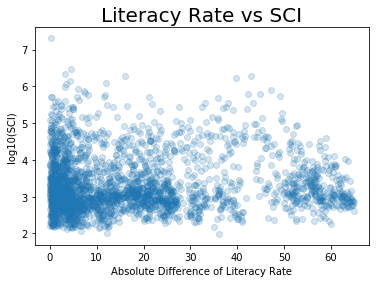

In [6]:
import math
merged['scaled_sci'] = pd.to_numeric(sci_data['scaled_sci'], errors='coerce')
merged['SCI_log10'] = np.log10(sci_data['scaled_sci'])

plt.scatter(merged['abs_diff_lit'], merged['SCI_log10'], alpha = 0.1)
plt.xlabel('Absolute Difference of Literacy Rate')
plt.ylabel('log10(SCI)')
plt.title('Literacy Rate vs SCI', fontsize=20)
plt.show()

In [7]:
#using ranksums to perform Wilcoxon Rank Sum Test on two samples: scaled_sci and abs_diff_lit
from scipy.stats import ranksums
ranksums(merged["scaled_sci"], merged["abs_diff_lit"])

RanksumsResult(statistic=86.33799902386622, pvalue=0.0)

In [8]:
#using spearmanr to get the spearman coeffecient of the two samples
from scipy.stats import spearmanr
sp_coef = spearmanr(merged["scaled_sci"], merged["abs_diff_lit"])
print(sp_coef)

SpearmanrResult(correlation=0.03110831439808077, pvalue=0.028303049697876836)
